#q1
@task(retries=3, retry_delay_seconds=2, name="Read taxi data")
#q2
- the first one 0 9 3 * *

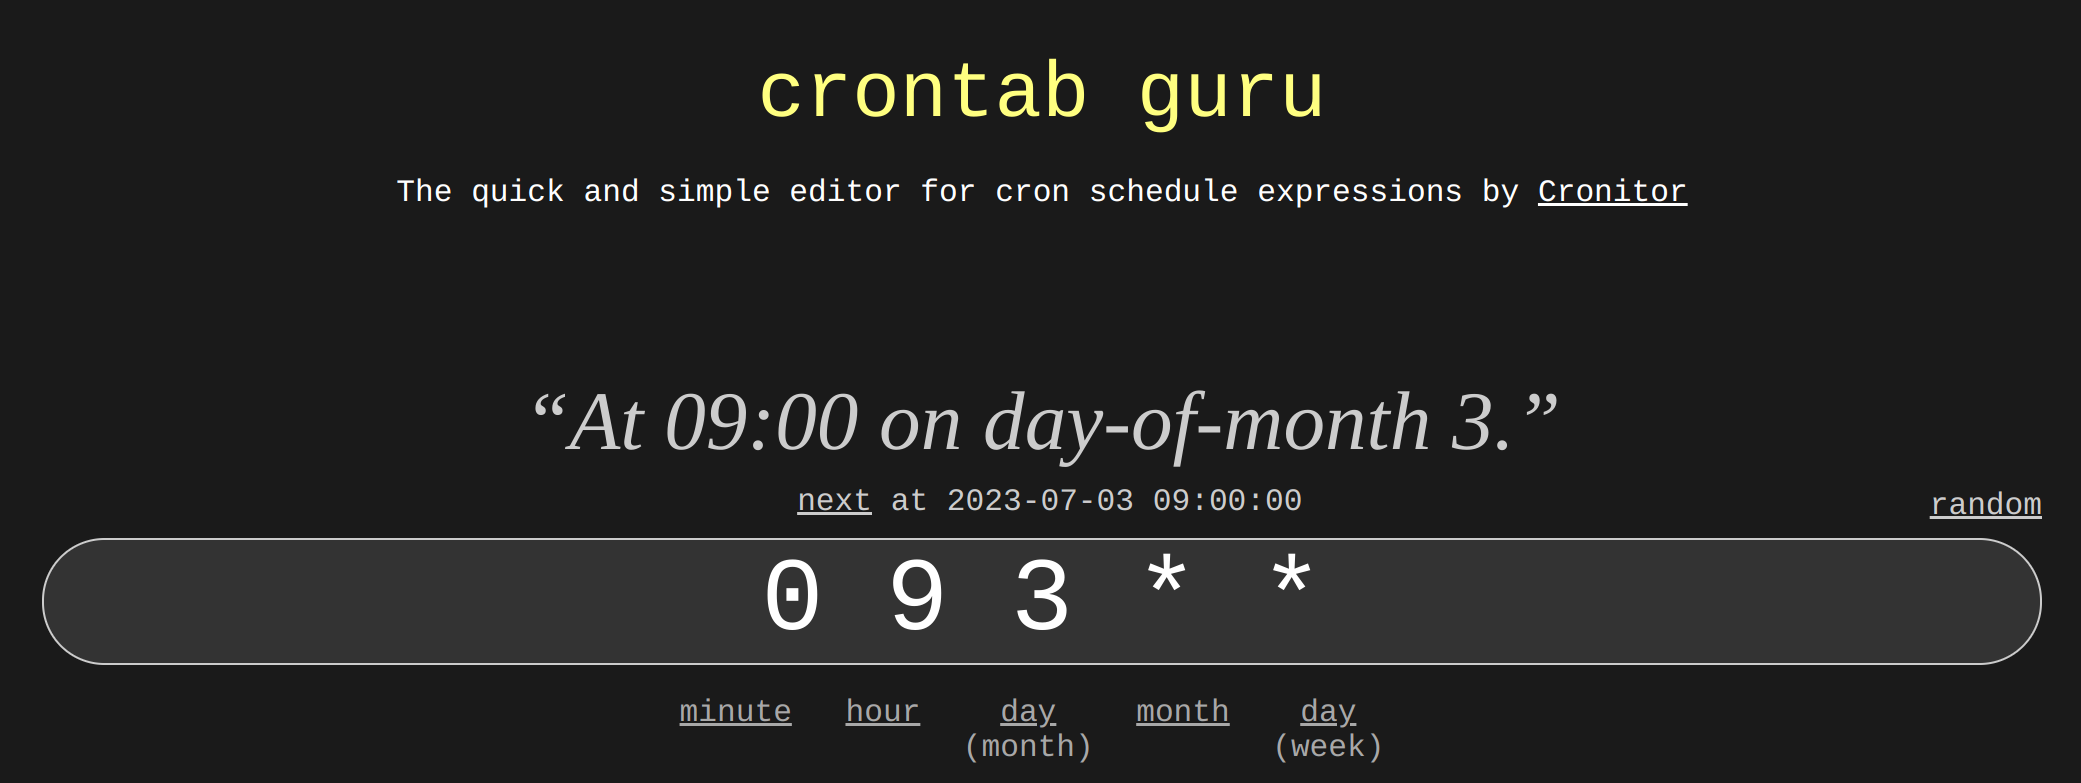

In [1]:
#!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet" -O ./code/data/green_tripdata_2023-01.parquet
#!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet" -O ./code/data/green_tripdata_2023-02.parquet
#!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet" -O ./code/data/green_tripdata_2023-03.parquet
import sys
sys.path.append('./code')

In [2]:
import pandas as pd
# Provide the URL of the Parquet file
training_url = "./code/data/green_tripdata_2023-01.parquet"

# Read the Parquet file into a pandas DataFrame
train_df = pd.read_parquet(training_url)

# Explore the DataFrame or perform further data processing
print(train_df.head())

# Provide the URL of the Parquet file
validation_url = "./code/data/green_tripdata_2023-02.parquet"

# Read the Parquet file into a pandas DataFrame
val_df = pd.read_parquet(validation_url)

# Explore the DataFrame or perform further data processing
print(val_df.head())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0   

In [3]:
#!prefect config view --show-defaults
!prefect config view

# clear config setting to avoid a bug in set
!prefect config unset PREFECT_API_URL

# use a local Prefect server
!prefect config set PREFECT_API_URL="http://prefect_mlops:4200/api"

# use Prefect Cloud
# !prefect config set PREFECT_API_URL="https://api.prefect.cloud/api/accounts/[ACCOUNT-ID]/workspaces/[WORKSPACE-ID]"


PREFECT_PROFILE='default'

'PREFECT_API_URL' is not set in profile 'default'.
Set 'PREFECT_API_URL' to 'http://prefect_mlops:4200/api'.
Updated profile 'default'.


In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 1.7 MB 11.1 MB/s            
     |████████████████████████████████| 1.6 MB 118.1 MB/s            
     |████████████████████████████████| 17.7 MB 87.2 MB/s            
     |████████████████████████████████| 12.3 MB 74.8 MB/s            
     |████████████████████████████████| 2.4 MB 72.5 MB/s            
     |████████████████████████████████| 53 kB 5.7 MB/s             
     |████████████████████████████████| 200.3 MB 8.4 kB/s             
     |████████████████████████████████| 143 kB 102.7 MB/s            
     |████████████████████████████████| 840 kB 76.6 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 91 kB 19.5 MB/s             
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492022 sha256=7885948a0a0e2b7bf3b684e5cd5389288db33a9f54b5426f42d4af47a53b2efb
  Stored in directory: /home/jovyan/.cache/pip/wheels/5e/a9/47/f118e66afd12240e4662752cc22cefae5d97275623aa8ef57

In [7]:
# this is not a deployment, but generates flows and flow-runs in the prefect db
# and to run successfully it needs the paths to be modified from the git cloned version to this:
# def main_flow_local(
#     train_path: str = "./code/data/green_tripdata_2023-01.parquet",
#     val_path: str = "./code/data/green_tripdata_2023-02.parquet",
!python3 ./code/orchestrate.py

13:17:07.708 | INFO    | prefect.engine - Created flow run 'viridian-elk' for flow 'main-flow-local'
13:17:08.403 | INFO    | Flow run 'viridian-elk' - Created task run 'read_data-0' for task 'read_data'
13:17:08.404 | INFO    | Flow run 'viridian-elk' - Executing 'read_data-0' immediately...
13:17:08.920 | INFO    | Task run 'read_data-0' - Finished in state Completed()
13:17:08.946 | INFO    | Flow run 'viridian-elk' - Created task run 'read_data-1' for task 'read_data'
13:17:08.947 | INFO    | Flow run 'viridian-elk' - Executing 'read_data-1' immediately...
13:17:09.348 | INFO    | Task run 'read_data-1' - Finished in state Completed()
13:17:09.375 | INFO    | Flow run 'viridian-elk' - Created task run 'add_features-0' for task 'add_features'
13:17:09.376 | INFO    | Flow run 'viridian-elk' - Executing 'add_features-0' immediately...
13:17:09.916 | INFO    | Task run 'add_features-0' - Finished in state Completed()
13:17:09.944 | INFO    | Flow run 'viridian-elk' - Created task run 

In [8]:
!prefect project init

Created project in /home/work; no new files created.


In [ ]:
# create mlflow-prefect-pool via UI (docker logs prefect_mlops -> click on link) as this command doesn't work:
# prefect work-pool create -t process -p mlflow-prefect-pool
# under File -> new -> Terminal open new termial to execute this code (in VSCode terminal user and urls to prefect and mlflow containers will be different)
# prefect agent start -p mlops-prefect-pool -q default
# under File -> new -> Terminal open another termial to execute this code (as prefect agent start hangs up terminal indefinitely)
# prefect worker start -p mlops-prefect-pool
# mlops-prefect-pool status should have changed to "green" in the UI

Starting v2.10.8 agent connected to http://prefect_mlops:4200/api...

  ___ ___ ___ ___ ___ ___ _____     _   ___ ___ _  _ _____
 | _ \ _ \ __| __| __/ __|_   _|   /_\ / __| __| \| |_   _|
 |  _/   / _|| _|| _| (__  | |    / _ \ (_ | _|| .` | | |
 |_| |_|_\___|_| |___\___| |_|   /_/ \_\___|___|_|\_| |_|


Agent started! Looking for work from work pool 'mlops-prefect-pool'...


In [21]:
# under File -> new -> Terminal open another termial to execute this code or try it with ! in jupyter (seems to work)
!prefect deploy ./code/orchestrate.py:main_flow_local -n taxi_local -p mlops-prefect-pool
# then start a worker in the new terminal window and run:
# prefect deployment run main-flow-local/taxi_local
# NOTICE THAT main_flow_local/taxi_local HAS CHANGED TO main-flow-local/taxi_local
# USE this command to see what deployments are actually available and their exact names!!!
# prefect deployment ls 

Deployment 'main-flow-local/taxi_local' successfully created with id 
'67838ea5-574d-463f-8de2-6ec8683deeae'.
View Deployment in UI: 
http://prefect_mlops:4200/deployments/deployment/67838ea5-574d-463f-8de2-6ec8683
deeae

To execute flow runs from this deployment, start a worker that pulls work from 
the 'mlops-prefect-pool' work pool


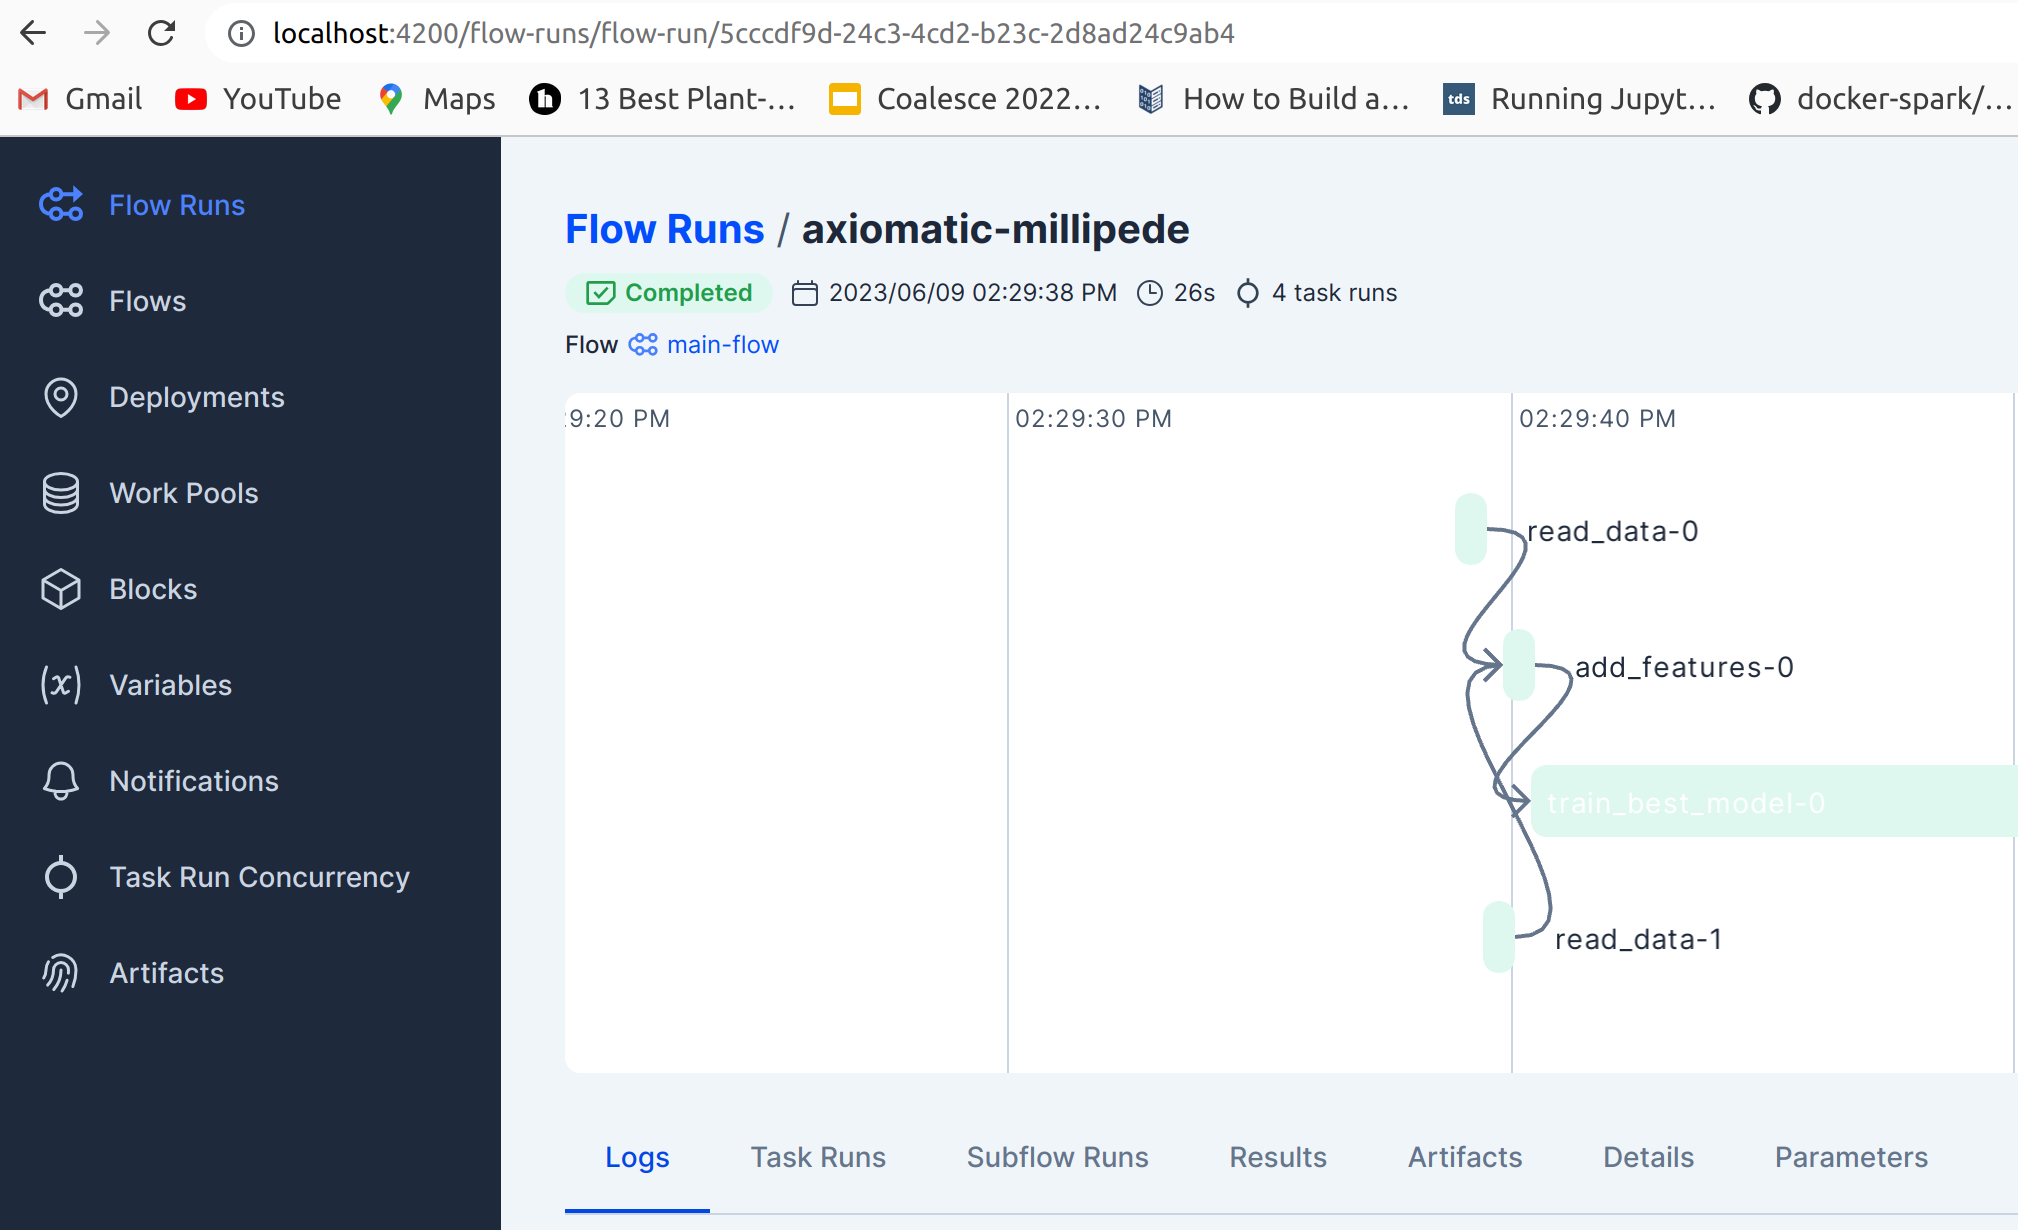

#q3: rmse 5.19931

In [11]:
# run this to add aws creds..
!python3 ./code/s3_block.py

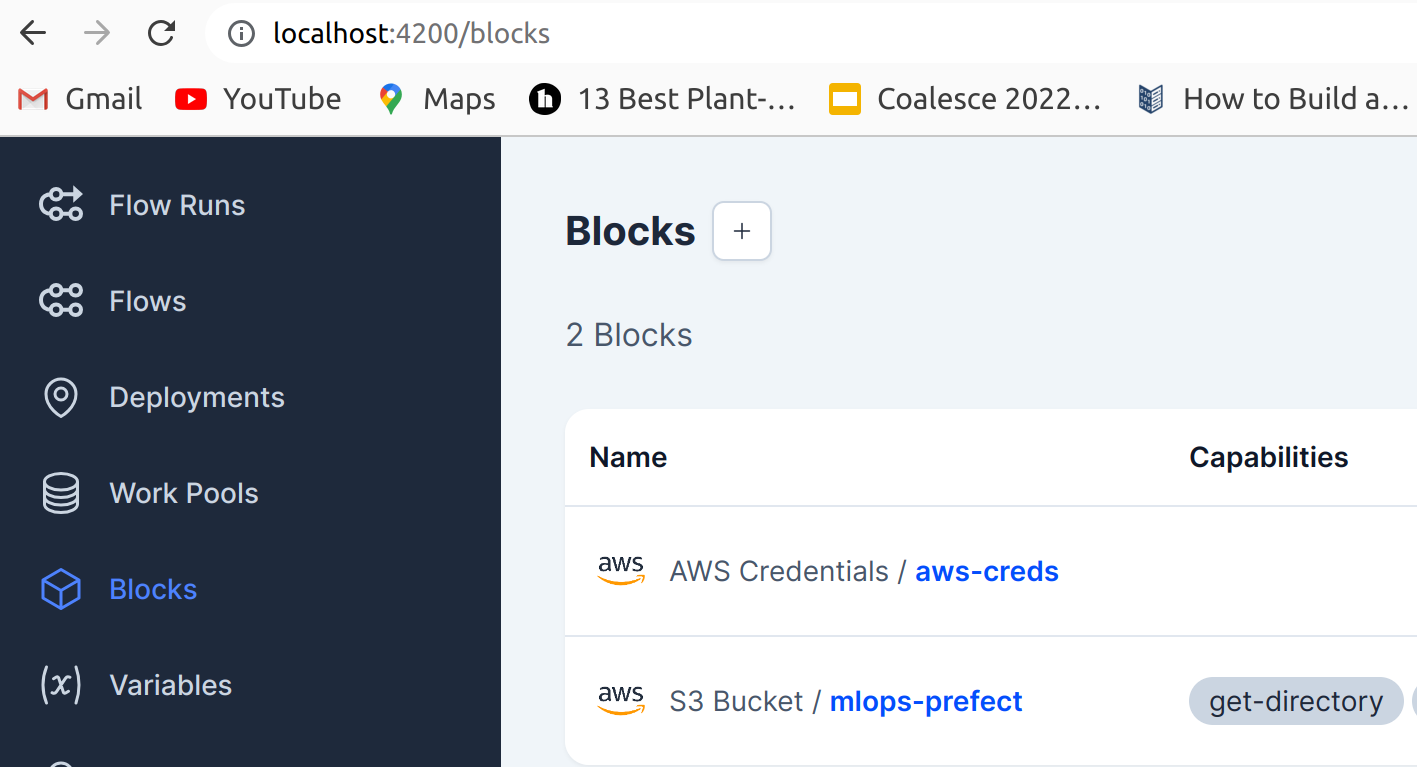

In [8]:
# upload .parquet files to s3 bucket before deleting them locally
#from utils import upload_to_s3
#import os 

#files = os.listdir("data")
#for file in files:
#    if file.endswith(".parquet"):
#        upload_to_s3(f"data/{file}", "mlops-prefect")     

In [22]:
# under File -> new -> Terminal open another termial to execute this code or try it with ! in jupyter (seems to work)
!prefect deploy ./code/orchestrate_s3.py:main_flow_s3 -n taxi_s3 -p mlops-prefect-pool
# then start a worker in the new terminal window and run:
# prefect deployment run main-flow-s3/taxi_s3
# NOTICE THAT main_flow_s3/taxi_s3 HAS CHANGED TO main-flow-s3/taxi_s3
# USE this command to see what deployments are actually available and their exact names!!!
# prefect deployment ls 

Deployment 'main-flow-s3/taxi_s3' successfully created with id 
'ab3ab912-2df9-4f20-85e5-99ed991647a0'.
View Deployment in UI: 
http://prefect_mlops:4200/deployments/deployment/ab3ab912-2df9-4f20-85e5-99ed991
647a0

To execute flow runs from this deployment, start a worker that pulls work from 
the 'mlops-prefect-pool' work pool


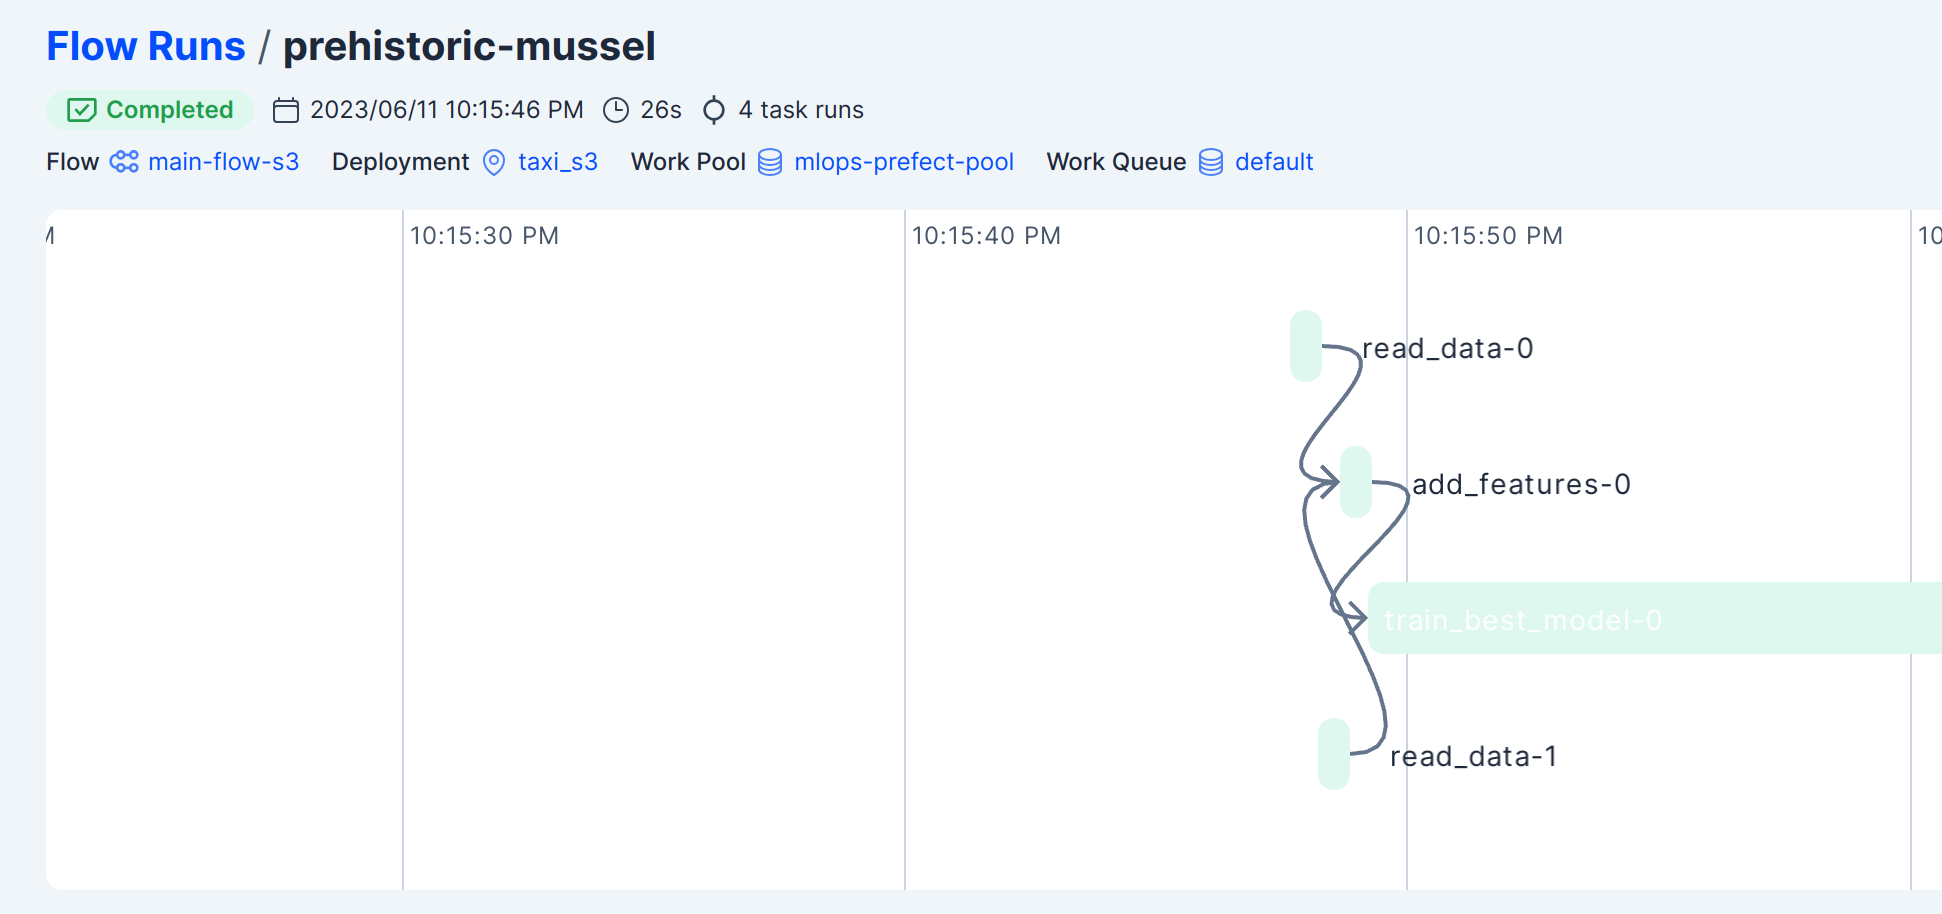

In [23]:
# before trying this with git clone - test run with regular prefect.yaml:
!prefect deploy ./code/orchestrate_params.py:main_flow_params -n taxi_params -p mlops-prefect-pool
# then in the UI create new custom run and set paths to data
# "./code/data/green_tripdata_2023-01.parquet"
# "./code/data/green_tripdata_2023-02.parquet"


Deployment 'main-flow-params/taxi_params' successfully created with id 
'69e0cfe3-3d5d-4d7d-ad1d-7ce6ec03ac70'.
View Deployment in UI: 
http://prefect_mlops:4200/deployments/deployment/69e0cfe3-3d5d-4d7d-ad1d-7ce6ec0
3ac70

To execute flow runs from this deployment, start a worker that pulls work from 
the 'mlops-prefect-pool' work pool


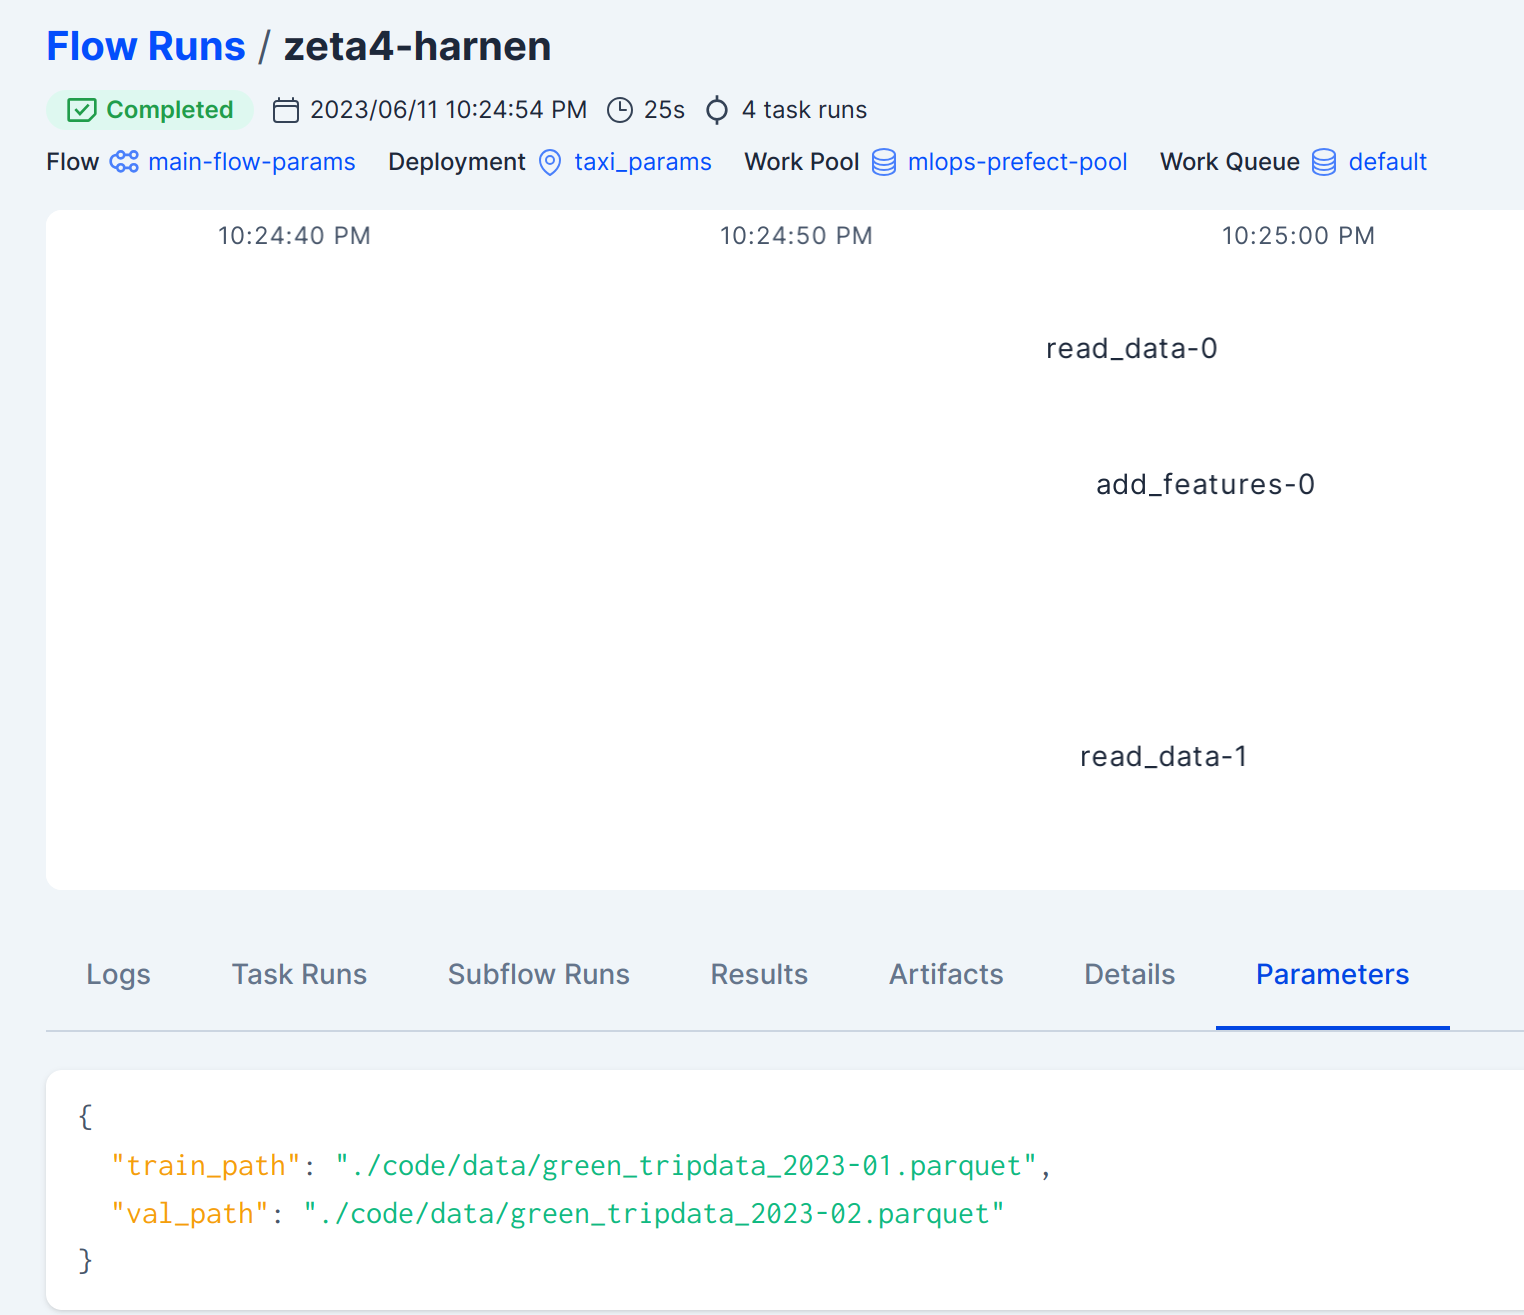

In [24]:
!prefect deployment ls

                              Deployments                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Name                         ┃ ID                                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ main-flow-local/taxi_local   │ 67838ea5-574d-463f-8de2-6ec8683deeae │
│ main-flow-params/taxi_params │ 69e0cfe3-3d5d-4d7d-ad1d-7ce6ec03ac70 │
│ main-flow-s3/taxi_s3         │ ab3ab912-2df9-4f20-85e5-99ed991647a0 │
└──────────────────────────────┴──────────────────────────────────────┘


In [43]:
# then rename prefect.yaml to prefect_nogit.yaml and prefect_git.yaml into prefect.yaml to run with pull settings
# repeat the deployment under taxi_git name as deployment.yaml settings are different for it - and copy file orchestrate_git.py from ./code into .
# otherwise this deployment if starts with ./code or code will always double the code/code in the path - it seems like prefect's bug:
!prefect deploy --name taxi_git orchestrate_git.py:main_flow_git \
--params "{\"train_path\": \"./data/green_tripdata_2023-01.parquet\", \"val_path\": \"./data/green_tripdata_2023-02.parquet\"}" --pool mlops-prefect-pool
# and after running this command - DELETE the ./code directory (better to rename just in case) otherwise git clone will fail!!!
# then in the UI create new custom run and set paths to data
# "./data/green_tripdata_2023-01.parquet"
# "./data/green_tripdata_2023-02.parquet"

Deployment 'main-flow-git/taxi_git' successfully created with id 
'153566a3-7e04-4f55-974d-acebc55703c0'.
View Deployment in UI: 
http://prefect_mlops:4200/deployments/deployment/153566a3-7e04-4f55-974d-acebc55
703c0

To execute flow runs from this deployment, start a worker that pulls work from 
the 'mlops-prefect-pool' work pool


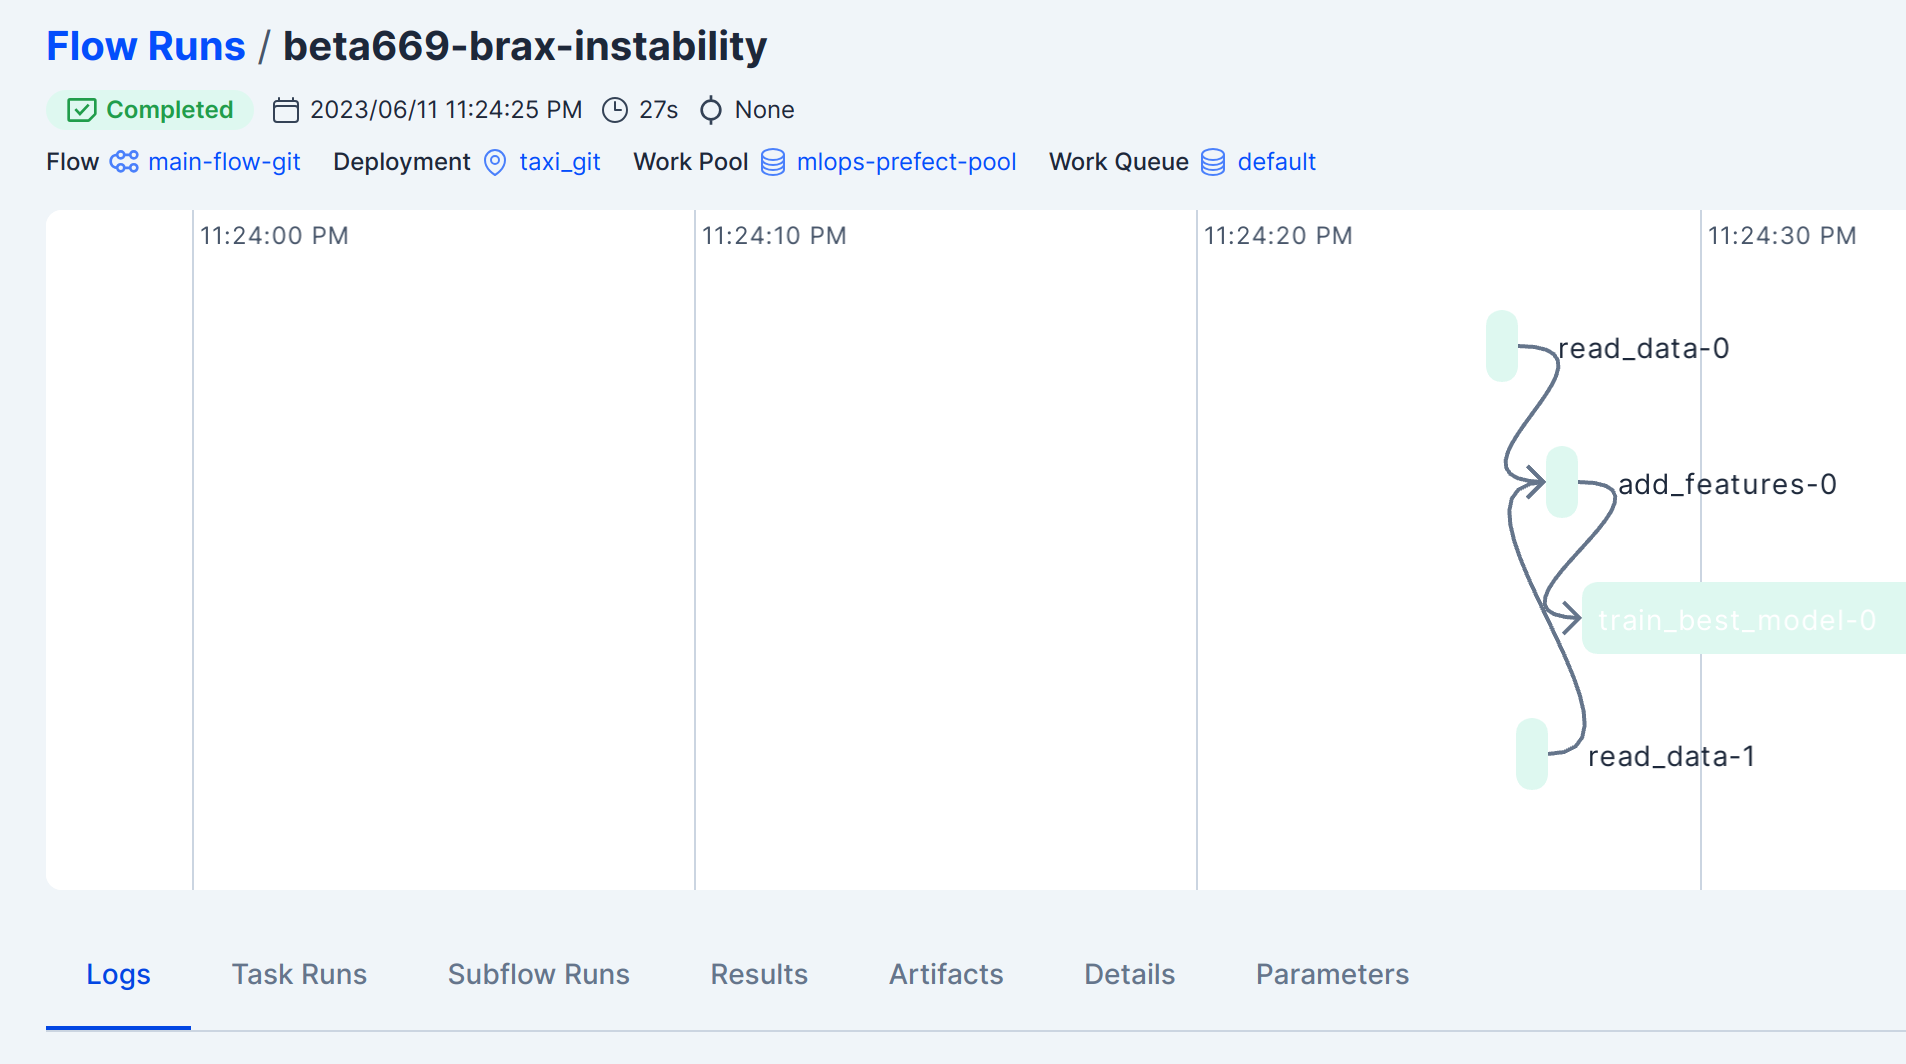

In [26]:
# in UI create a custom run for taxi_s3 with params:
#{
#  "train_path": "./data/green_tripdata_2023-02.parquet",
#  "val_path": "./data/green_tripdata_2023-03.parquet"
#}
# to get the artifacts for Feb/Mar combo RMSE = 5.37

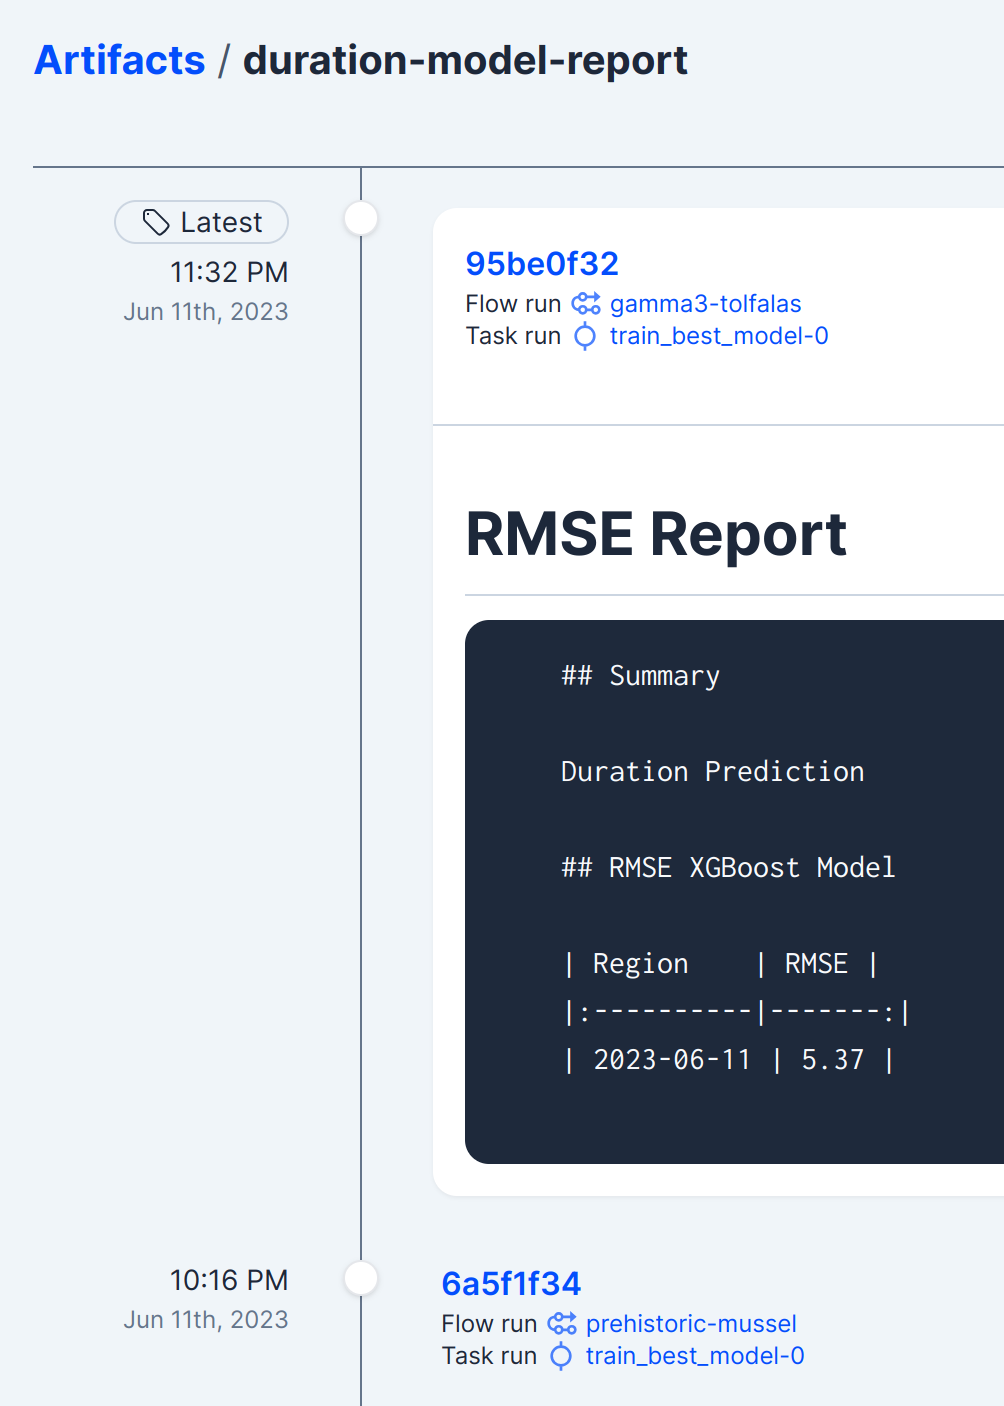

In [44]:
!prefect project recipe ls

                           Available project recipes                            
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Name       ┃ Description                                                     ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ docker     │ Store project within a custom docker image alongside its        │
│            │ runtime environment                                             │
│ docker-gcs │ Store project within GCS and build a custom docker image for    │
│            │ runtime                                                         │
│ docker-git │ Store project within a git repository and build a custom docker │
│            │ image for runtime                                               │
│ docker-s3  │ Store project within S3 and build a custom docker image for     │
│            │ runtime                                                         │
│ gcs        │ Store project

In [45]:
!pip install prefect_email

You should consider upgrading via the '/opt/conda/bin/python3.10 -m pip install --upgrade pip' command.


In [46]:
!prefect block register -m prefect_email

Successfully registered 1 block

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registered Blocks        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Email Server Credentials │
└──────────────────────────┘

 To configure the newly registered blocks, go to the Blocks page in the Prefect 
UI: http://prefect_mlops:4200/blocks/catalog



In [11]:
# switch to cloud to use email notifications and creds
# clear config setting to avoid a bug in set
!prefect config unset PREFECT_API_URL

# use Prefect Cloud
!prefect config set PREFECT_API_URL=$PREFECT_API_URL
!prefect config set PREFECT_API_KEY=$PREFECT_API_KEY

In [10]:
#q5 answer: email_send_message
# we switched configs to the server, now need to modify prefect.yaml to prefect_git.yaml and prefect_nogit.yaml back to prefect.yaml (very annoying)
# mlops-prefect-pool should be created in the cloud, then start agent and worker in new terminal windows:
# prefect agent start -p mlops-prefect-pool -q default
# prefect worker start -p mlops-prefect-pool
# under File -> new -> Terminal open another termial to execute this code or try it with ! in jupyter (seems to work)
!prefect deploy ./code/orchestrate_email.py:main_flow_email -n taxi_email -p mlops-prefect-pool
# then start a worker in the new terminal window and run or use custom run from the cloud UI:
# prefect deployment run main-flow-email/taxi_email
# NOTICE THAT main_flow_email/taxi_email HAS CHANGED TO main-flow-email/taxi_email
# USE this command to see what deployments are actually available and their exact names!!!
# prefect deployment ls 


This deployment references a work pool that does not exist. This means no worker
will be able to pick up its runs. You can create a work pool in the Prefect UI.
Deployment 'main-flow-email/taxi_email' successfully created with id 
'36d645ef-b157-4f88-8023-f51b1e60d570'.
View Deployment in UI: 
https://app.prefect.cloud/account/e9796d3f-7997-45df-9f2a-e9d402122ef8/workspace
/a9b7dc58-eede-4f3d-99f7-c18595aa28cc/deployments/deployment/36d645ef-b157-4f88-
8023-f51b1e60d570

This deployment does not specify a work pool or queue, which means no worker 
will be able to pick up its runs. To add a work pool, edit the deployment spec 
and re-run this command, or visit the deployment in the UI.


In [1]:
#q6 answer is: Actions

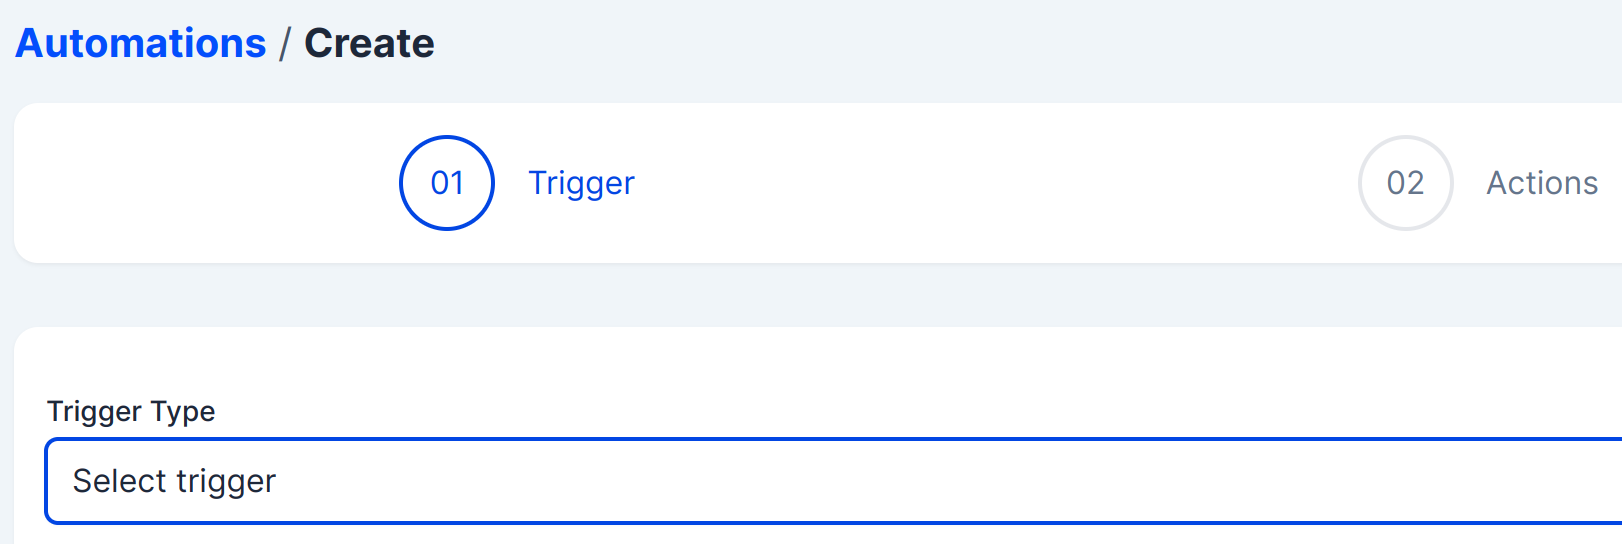

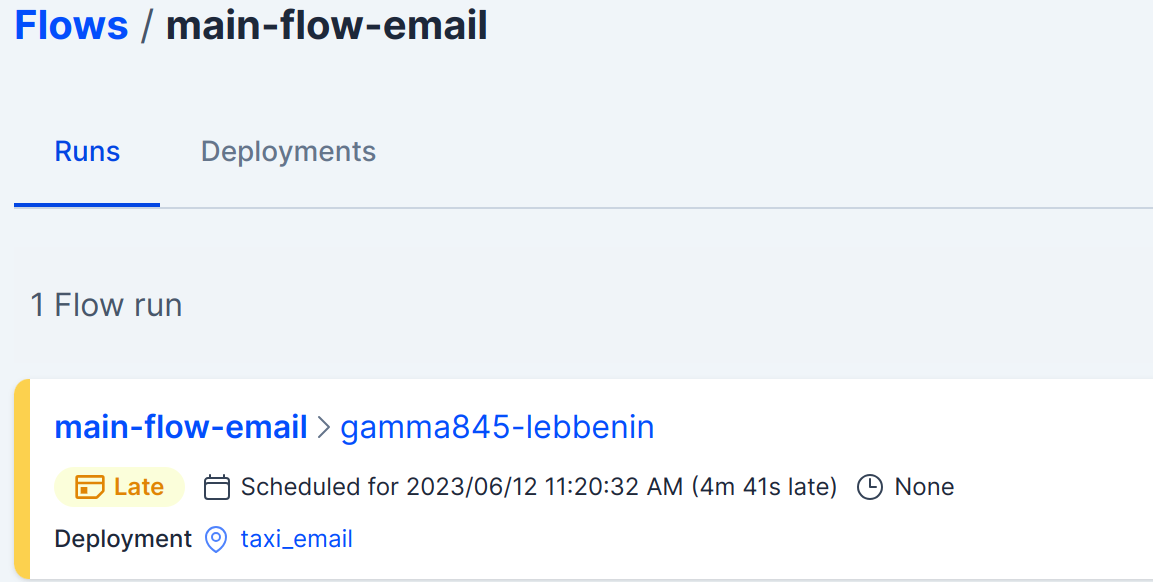